In [1]:
%cd ..
%pwd

/data_diet


'/data_diet'

In [2]:
%ls exps/

baseline/                       keep_max_grad_norm_scores_20/
keep_max_error_l2_norm_scores/  keep_max_input_variance_scores/
keep_max_grad_norm/             keep_max_noised_input_variance_scores/
keep_max_grad_norm_scores/


In [3]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import re

In [4]:
# load all recorder.pkl in exps/keep_max_*/size_*/run_8 and parse the * ask type and size and run
recorders = glob.glob('exps/keep_max_*/size_*/run_*/recorder.pkl')
recorders

['exps/keep_max_error_l2_norm_scores/size_45000/run_1/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_45000/run_0/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_25000/run_1/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_25000/run_0/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_35000/run_1/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_35000/run_0/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_20000/run_1/recorder.pkl',
 'exps/keep_max_error_l2_norm_scores/size_20000/run_0/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_45000/run_1/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_45000/run_0/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_25000/run_6/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_25000/run_1/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_25000/run_2/recorder.pkl',
 'exps/keep_max_input_variance_scores/size_25000/run_7/recorder.pkl',
 'exps/keep_max_input_varian

In [5]:
# regex for parsing the * ask type and size and run

regex = re.compile(r'exps/keep_max_(?P<keep_max>.+)/size_(?P<size>\d+)/run_(?P<run>\d+)/recorder.pkl')

# parse the * ask type and size and run
parsed = {recorder: dict(score=(p := regex.match(recorder).groupdict())['keep_max'],size=int(p['size']),run=int(p['run'])) for recorder in recorders}
parsed

{'exps/keep_max_error_l2_norm_scores/size_45000/run_1/recorder.pkl': {'score': 'error_l2_norm_scores',
  'size': 45000,
  'run': 1},
 'exps/keep_max_error_l2_norm_scores/size_45000/run_0/recorder.pkl': {'score': 'error_l2_norm_scores',
  'size': 45000,
  'run': 0},
 'exps/keep_max_error_l2_norm_scores/size_25000/run_1/recorder.pkl': {'score': 'error_l2_norm_scores',
  'size': 25000,
  'run': 1},
 'exps/keep_max_error_l2_norm_scores/size_25000/run_0/recorder.pkl': {'score': 'error_l2_norm_scores',
  'size': 25000,
  'run': 0},
 'exps/keep_max_error_l2_norm_scores/size_35000/run_1/recorder.pkl': {'score': 'error_l2_norm_scores',
  'size': 35000,
  'run': 1},
 'exps/keep_max_error_l2_norm_scores/size_35000/run_0/recorder.pkl': {'score': 'error_l2_norm_scores',
  'size': 35000,
  'run': 0},
 'exps/keep_max_error_l2_norm_scores/size_20000/run_1/recorder.pkl': {'score': 'error_l2_norm_scores',
  'size': 20000,
  'run': 1},
 'exps/keep_max_error_l2_norm_scores/size_20000/run_0/recorder.pkl': 

In [6]:
# load tqdm
from tqdm.auto import tqdm

In [7]:
# load the recorders using np
recorders = {recorder: np.load(recorder, allow_pickle=True) for recorder in tqdm(recorders)}

  0%|          | 0/50 [00:00<?, ?it/s]

In [8]:
# Get the last 'test_acc' and 'test_loss' for each recorder and the max 'test_acc' and min 'test_loss' for each recorder and create a dataframe with these fields and merge in the entries from the parsed dict
df = pd.DataFrame({recorder: {**parsed[recorder], **{'max_test_acc': max(recorders[recorder]['test_acc']), 'min_test_loss': min(recorders[recorder]['test_loss']), 'last_test_acc': recorders[recorder]['test_acc'][-1], 'last_test_loss': recorders[recorder]['test_loss'][-1]}} for recorder in tqdm(recorders)})
df = df.T
df['pruned_fraction'] = 1-df['size']/50000
df

  0%|          | 0/50 [00:00<?, ?it/s]

,score,size,run,max_test_acc,min_test_loss,last_test_acc,last_test_loss,pruned_fraction
exps/keep_max_error_l2_norm_scores/size_45000/run_1/recorder.pkl,error_l2_norm_scores,45000,1,0.9528,0.175053,0.9519,0.175453,0.1
exps/keep_max_error_l2_norm_scores/size_45000/run_0/recorder.pkl,error_l2_norm_scores,45000,0,0.9507,0.194602,0.9499,0.197604,0.1
exps/keep_max_error_l2_norm_scores/size_25000/run_1/recorder.pkl,error_l2_norm_scores,25000,1,0.9545,0.167687,0.9545,0.170939,0.5
exps/keep_max_error_l2_norm_scores/size_25000/run_0/recorder.pkl,error_l2_norm_scores,25000,0,0.9508,0.17412,0.9499,0.177815,0.5
exps/keep_max_error_l2_norm_scores/size_35000/run_1/recorder.pkl,error_l2_norm_scores,35000,1,0.9536,0.178126,0.9521,0.179939,0.3
exps/keep_max_error_l2_norm_scores/size_35000/run_0/recorder.pkl,error_l2_norm_scores,35000,0,0.9553,0.171417,0.9539,0.174168,0.3
exps/keep_max_error_l2_norm_scores/size_20000/run_1/recorder.pkl,error_l2_norm_scores,20000,1,0.9466,0.194261,0.9448,0.196452,0.6
exps/keep_max_error_l2_norm_scores/size_20000/run_0/recorder.pkl,error_l2_norm_scores,20000,0,0.9494,0.18165,0.9483,0.183135,0.6
exps/keep_max_input_variance_scores/size_45000/run_1/recorder.pkl,input_variance_scores,45000,1,0.9526,0.186131,0.9522,0.187223,0.1
exps/keep_max_input_variance_scores/size_45000/run_0/recorder.pkl,input_variance_scores,45000,0,0.951,0.194004,0.9497,0.197696,0.1


In [13]:
# save dataframe to numpy records and then save as file
np.save('figure1_reproduction.npy', df.to_records())

In [15]:
pd.DataFrame.from_records(df.to_records(), index='index')

,score,size,run,max_test_acc,min_test_loss,last_test_acc,last_test_loss,pruned_fraction
index,,,,,,,,
exps/keep_max_error_l2_norm_scores/size_45000/run_1/recorder.pkl,error_l2_norm_scores,45000,1,0.9528,0.175053,0.9519,0.175453,0.1
exps/keep_max_error_l2_norm_scores/size_45000/run_0/recorder.pkl,error_l2_norm_scores,45000,0,0.9507,0.194602,0.9499,0.197604,0.1
exps/keep_max_error_l2_norm_scores/size_25000/run_1/recorder.pkl,error_l2_norm_scores,25000,1,0.9545,0.167687,0.9545,0.170939,0.5
exps/keep_max_error_l2_norm_scores/size_25000/run_0/recorder.pkl,error_l2_norm_scores,25000,0,0.9508,0.17412,0.9499,0.177815,0.5
exps/keep_max_error_l2_norm_scores/size_35000/run_1/recorder.pkl,error_l2_norm_scores,35000,1,0.9536,0.178126,0.9521,0.179939,0.3
exps/keep_max_error_l2_norm_scores/size_35000/run_0/recorder.pkl,error_l2_norm_scores,35000,0,0.9553,0.171417,0.9539,0.174168,0.3
exps/keep_max_error_l2_norm_scores/size_20000/run_1/recorder.pkl,error_l2_norm_scores,20000,1,0.9466,0.194261,0.9448,0.196452,0.6
exps/keep_max_error_l2_norm_scores/size_20000/run_0/recorder.pkl,error_l2_norm_scores,20000,0,0.9494,0.18165,0.9483,0.183135,0.6
exps/keep_max_input_variance_scores/size_45000/run_1/recorder.pkl,input_variance_scores,45000,1,0.9526,0.186131,0.9522,0.187223,0.1


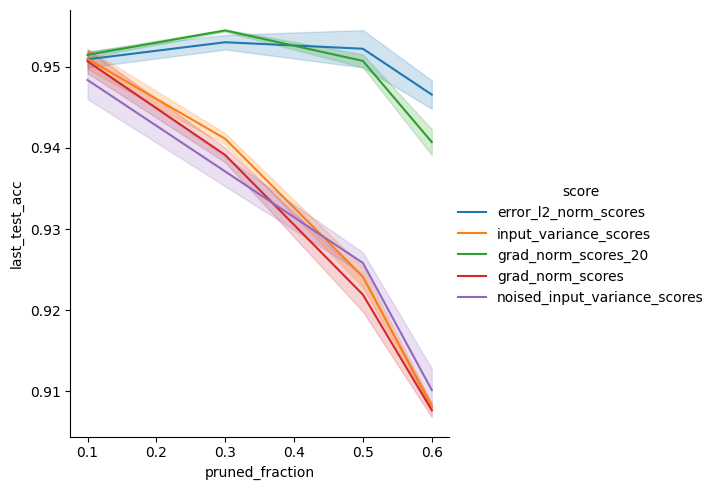

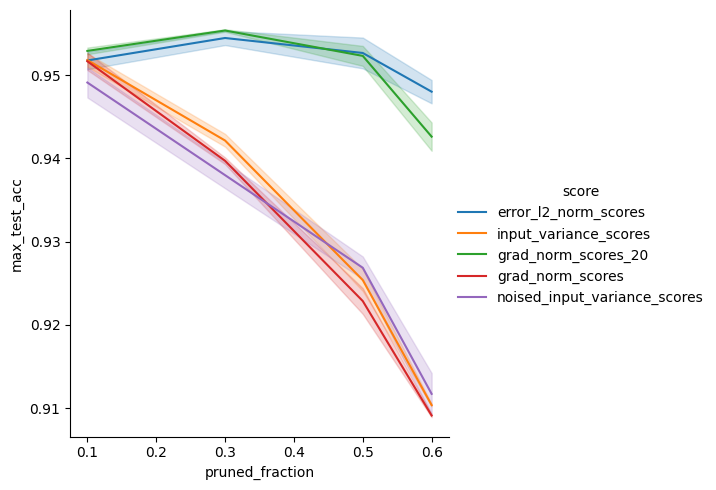

In [9]:
# Plot the 'last_test_acc' and 'last_test_loss' grouped by 'keep_max'
sns.relplot(data=df, x='pruned_fraction', y='last_test_acc', hue='score', kind='line')
sns.relplot(data=df, x='pruned_fraction', y='max_test_acc', hue='score', kind='line')
